In [42]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import scipy.stats as scs


import matplotlib.pyplot as plt

In [2]:
def plot_data(data):
    data.plot(figsize=(17.8, 10))
    plt.grid()
    legend = [u'Исходные данные']
    plt.legend(legend)
    plt.title(u'Зависимость курса золота от времени')
    plt.xlabel(u'Время')
    plt.ylabel(u'Курс золота')
    
def plot_hist(data):
    data.hist(figsize=(17.8, 10))
    plt.grid()
    legend = [u'Исходные данные']
    plt.legend(legend)
    plt.title(u'Гистограмма частот')
    plt.ylabel(u'Частота, шт.')
    plt.xlabel(u'Курс золота')

In [3]:
df = pd.read_csv('2_goda.csv', sep=';', keep_default_na=False)

In [4]:
df.head()

,date,cost,Unnamed: 2
0,28.02.2016,2971.89,
1,29.02.2016,3011.60,
2,01.03.2016,3011.60,
3,02.03.2016,2952.29,
4,03.03.2016,2910.01,


In [5]:
df.tail()

,date,cost,Unnamed: 2
727,24.02.2018,2413.3125,
728,25.02.2018,2411.3650,
729,26.02.2018,2409.4175,
730,27.02.2018,2407.4700,
731,28.02.2018,2385.4700,


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
date          732 non-null object
cost          732 non-null float64
Unnamed: 2    732 non-null object
dtypes: float64(1), object(2)
memory usage: 17.2+ KB


In [7]:
df.describe()

,cost
count,732.000000
mean,2489.848955
std,184.170861
min,2212.290000
25%,2337.890000
50%,2430.990000
75%,2651.470000
max,3011.600000


In [8]:
date_2_year = df[['date', 'cost']]
date_2_year['date'] = pd.to_datetime(date_2_year['date'])
date_2_year = date_2_year.set_index('date')

In [9]:
date_2_year.sort_index()

,cost
date,
2016-01-03,3011.6000
2016-01-04,2691.2100
2016-01-05,2636.1300
2016-01-06,2568.4700
2016-01-07,2717.3500
2016-01-08,2860.2500
2016-01-09,2757.6500
2016-01-10,2706.5600
2016-01-11,2589.7900


In [10]:
date_2_year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2016-02-28 to 2018-02-28
Data columns (total 1 columns):
cost    732 non-null float64
dtypes: float64(1)
memory usage: 11.4 KB


In [11]:
date_2_year.head()

,cost
date,
2016-02-28,2971.89
2016-02-29,3011.60
2016-01-03,3011.60
2016-02-03,2952.29
2016-03-03,2910.01


In [12]:
print(date_2_year)

                 cost
date                 
2016-02-28  2971.8900
2016-02-29  3011.6000
2016-01-03  3011.6000
2016-02-03  2952.2900
2016-03-03  2910.0100
2016-04-03  2947.7700
2016-05-03  2991.7900
2016-06-03  2979.0180
2016-07-03  2966.2460
2016-08-03  2953.4740
2016-09-03  2940.7020
2016-10-03  2927.9300
2016-11-03  2850.8200
2016-12-03  2853.2000
2016-03-13  2853.2000
2016-03-14  2834.1600
2016-03-15  2834.1600
2016-03-16  2797.7300
2016-03-17  2815.8100
2016-03-18  2798.5100
2016-03-19  2758.8900
2016-03-20  2758.8900
2016-03-21  2752.5900
2016-03-22  2752.5900
2016-03-23  2727.7500
2016-03-24  2679.6700
2016-03-25  2695.9400
2016-03-26  2686.4700
2016-03-27  2686.4700
2016-03-28  2660.8000
...               ...
2018-01-30  2440.3200
2018-01-31  2435.4600
2018-01-02  2426.5700
2018-02-02  2425.8400
2018-03-02  2423.3600
2018-04-02  2423.3600
2018-05-02  2434.3600
2018-06-02  2434.3600
2018-07-02  2473.6900
2018-08-02  2432.6000
2018-09-02  2431.0100
2018-10-02  2461.3600
2018-11-02

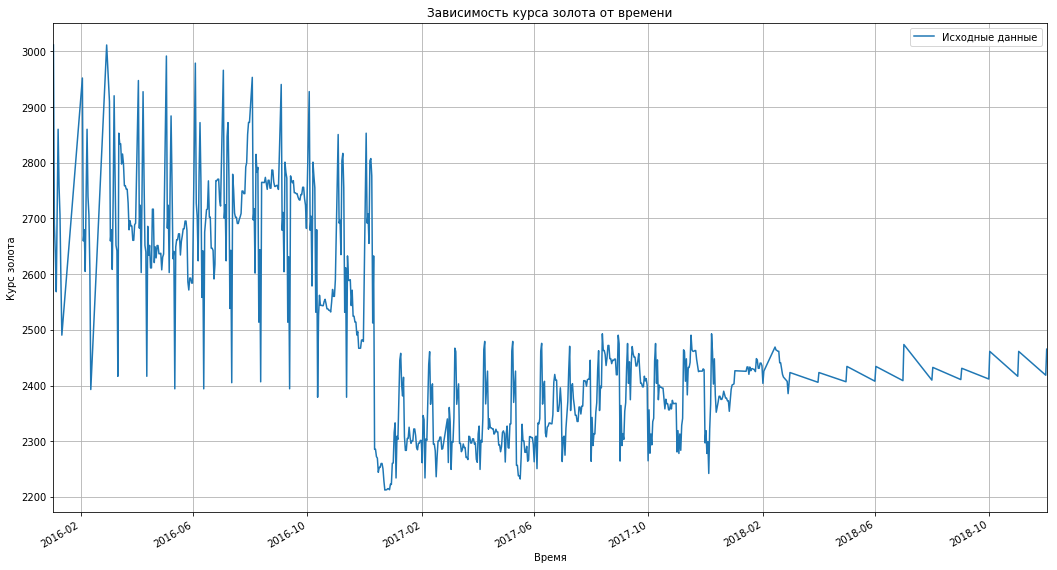

In [13]:
plot_data(date_2_year)
plt.show()

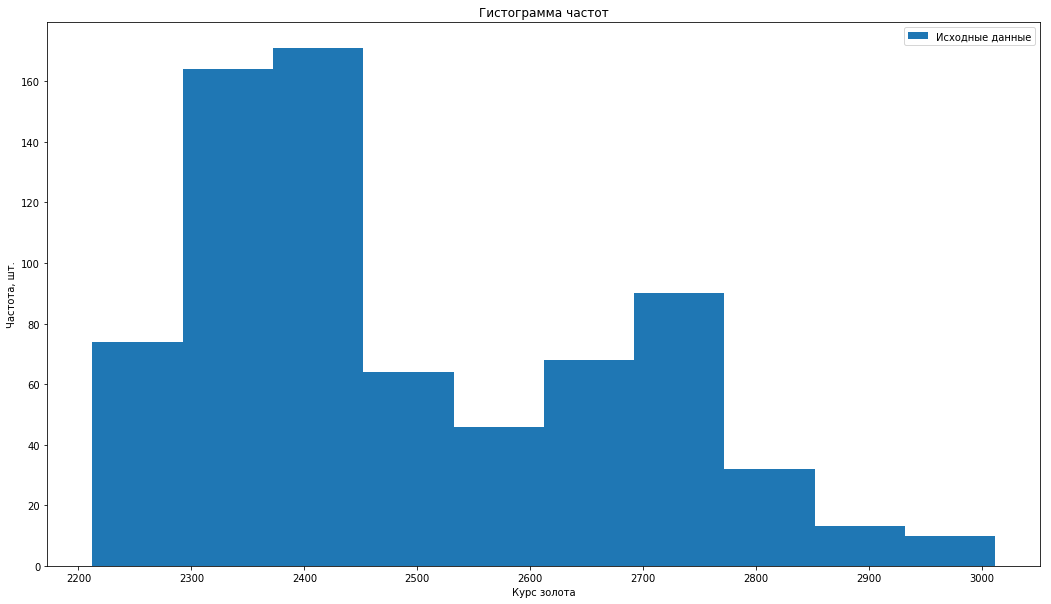

In [14]:
plot_hist(date_2_year['cost'])
plt.show()

In [15]:
sena = df.cost
sena.head()

0    2971.89
1    3011.60
2    3011.60
3    2952.29
4    2910.01
Name: cost, dtype: float64

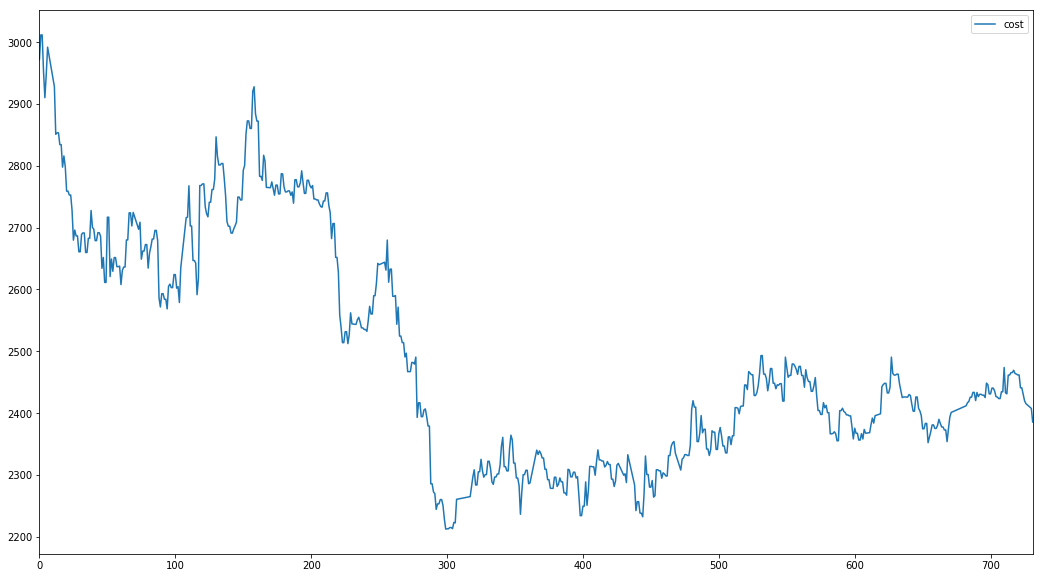

In [16]:
df.plot(figsize=(17.8, 10))
plt.show()

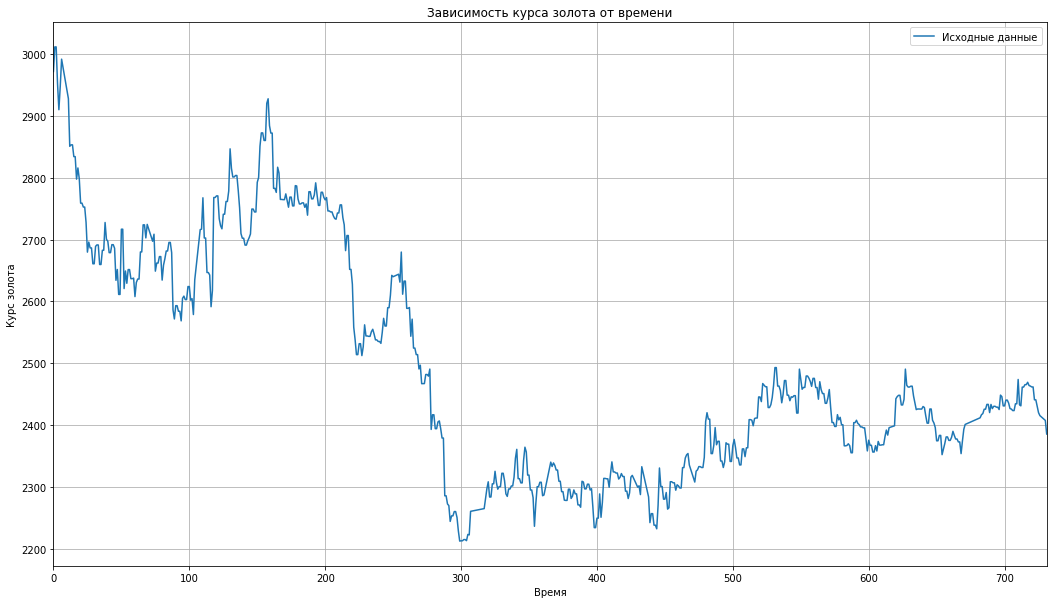

In [17]:
plot_data(df)
plt.show()

In [192]:
def moving_average(series, n):
    return np.average(series[-n:])

print(np.mean(df.cost))
moving_average(df.cost, 1)

2489.84895492


2385.4699999999998

In [193]:
def plotMovingAverage(series, n):
    rolling_mean = series.rolling(window=n).mean()#параметры скользящего среднего

    plt.figure(figsize=(15,5))#размер
    plt.title("Moving average\n window size = {}".format(n))#заголовок
    plt.plot(rolling_mean, "g", label="Rolling mean trend")#скол. среднее, цвет, подпись линии

    plt.plot(df.cost[n:], label="Actual values")#значения [n:],начиная с н до конца
    plt.legend(loc="upper left")#где расположить легенду, тут сверху слева
    plt.grid(True)#клеточки на графике

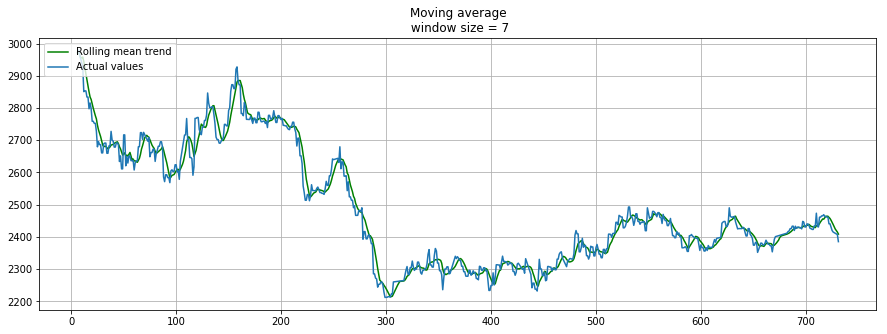

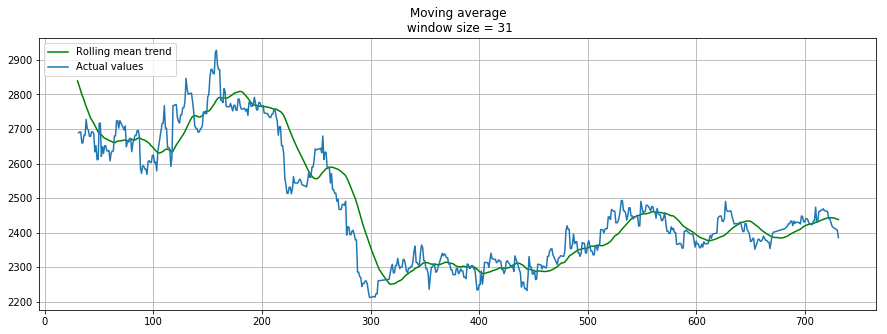

In [195]:
plotMovingAverage(df.cost, 7)# сглаживаем по неделям
plotMovingAverage(df.cost, 31)# сглаживаем по месяцам
plt.show()

In [196]:
def weighted_average(series, weights):#взвешанное среднее
    result = 0
    weights.reverse()
    for n in range(len(weights)):
        result += series[n] * weights[n]
    return result

weighted_average(df.cost, [0.6, 0.2, 0.1, 0.07, 0.03])

2937.5927000000001

In [197]:
def exponential_smoothing(series, alpha):#простое экспоненциальное сглаживаение
    result = [series[0]] #первое значение в данных
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

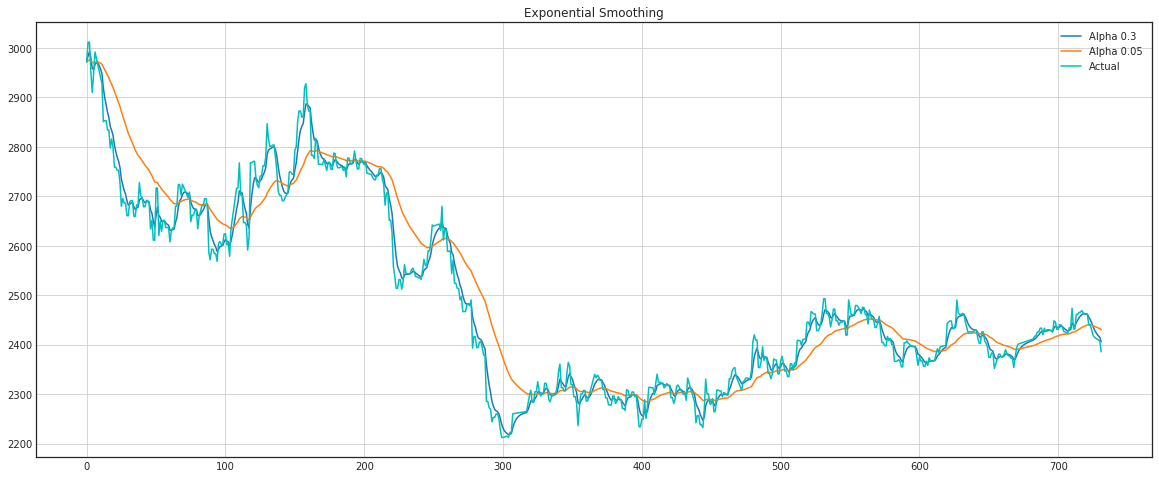

In [198]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(df.cost, alpha), label="Alpha {}".format(alpha))
    plt.plot(df.cost.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)
plt.show()

In [199]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

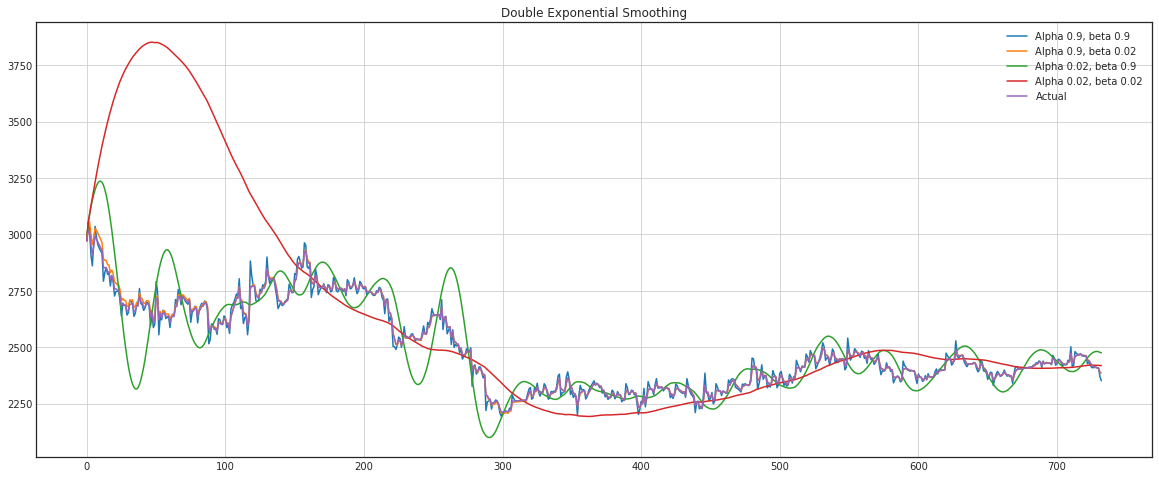

In [200]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(df.cost, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(df.cost.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
plt.show()

In [115]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

In [116]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

In [117]:
from scipy.optimize import minimize
data = df.cost[:500] # отложим часть данных для тестирования

# инициализируем значения параметров
x = [0, 0, 0] 

# Минимизируем функцию потерь с ограничениями на параметры
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

ZeroDivisionError: float division by zero

In [201]:
data = df.cost
model = HoltWinters(data[:-128], slen = 1*7, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 128, scaling_factor = 2.56)
model.triple_exponential_smoothing()

NameError: name 'alpha_final' is not defined

In [202]:
data = df.cost
model = HoltWinters(data[:-128], slen = 1*7, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 128, scaling_factor = 2.56)
model.triple_exponential_smoothing()

NameError: name 'alpha_final' is not defined

Стационарность

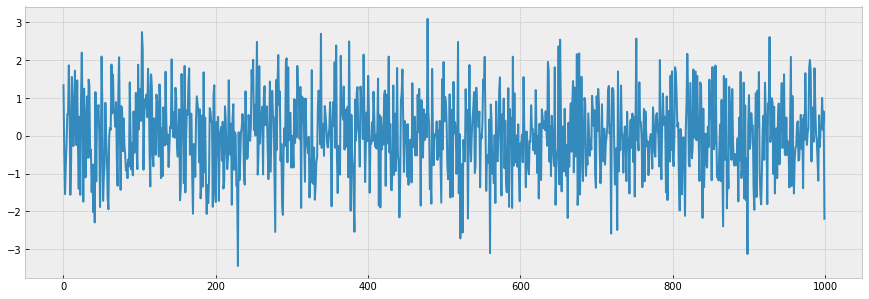

In [204]:
white_noise = np.random.normal(size=1000)
with plt.style.context('bmh'):  
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)
plt.show()

In [33]:
def plotProcess(n_samples=1000, rho=0):
    x = w = np.random.normal(size=n_samples)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))

for rho in [0, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

Критерий Дики-Фуллера: p=0.057614


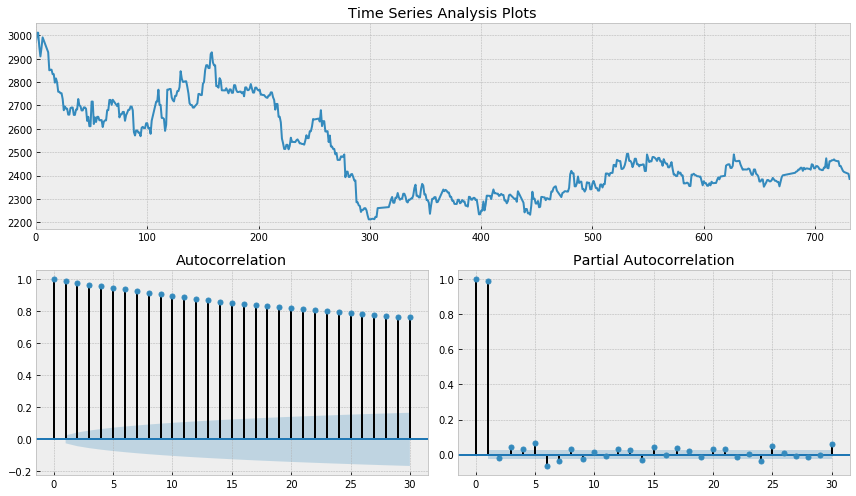

In [213]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(df.cost, lags=30)
plt.show()

/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tm

Критерий Дики-Фуллера: p=0.057614
Оптимальный параметр преобразования Бокса-Кокса: -8.375281


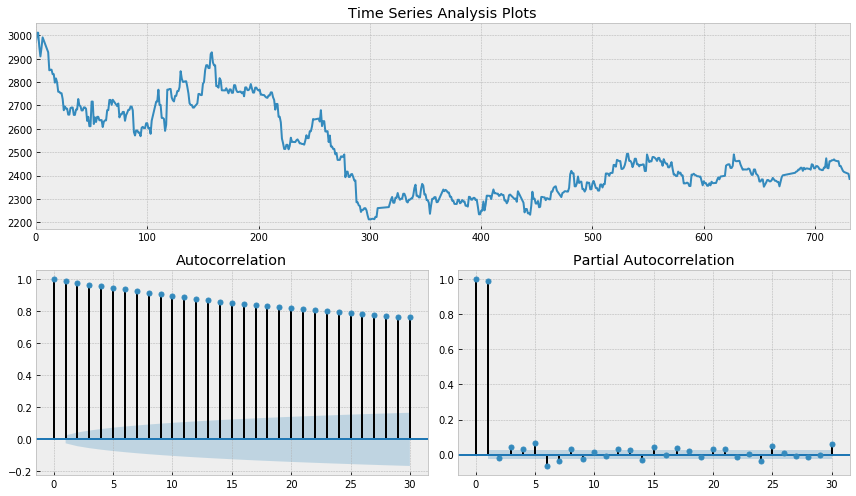

In [215]:
def invboxcox(y,lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

data = df.cost.copy()
data, lmbda = scs.boxcox(data+1) # прибавляем единицу, так как в исходном ряде есть нули
tsplot(df.cost, lags=30)
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
plt.show()

Критерий Дики-Фуллера: p=0.000000


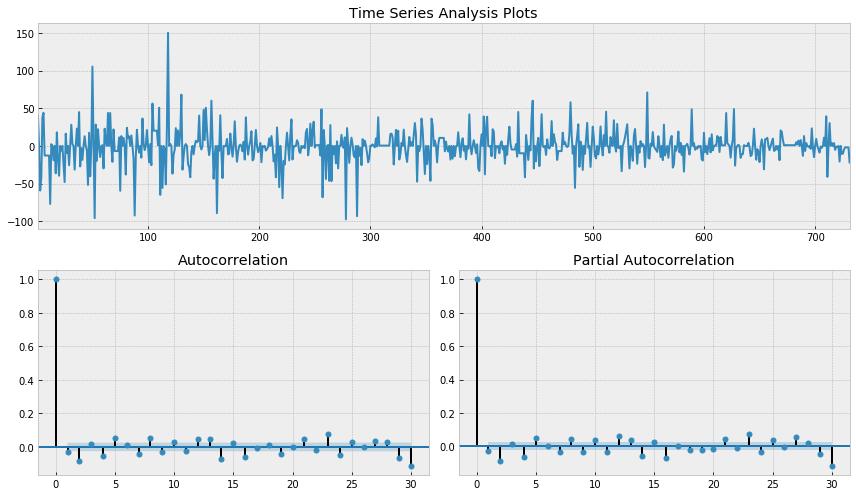

In [216]:
#проверка на сезонность
data = df.cost - df.cost.shift(1)
tsplot(data[1:], lags=30)
plt.show()

Критерий Дики-Фуллера: p=0.000000


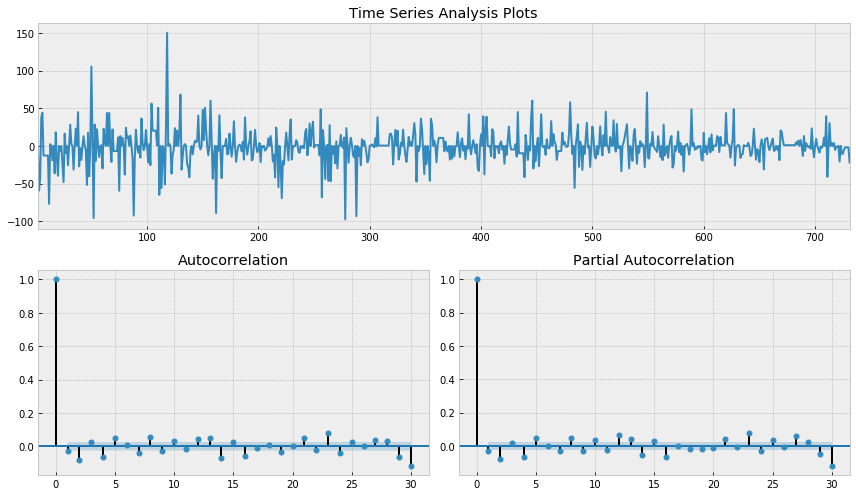

In [217]:
#первые разности
data = df.cost - df.cost.shift(1)
tsplot(data[1+1:], lags=30)
plt.show()

In [175]:
ps = range(0, 5)
d=1
qs = range(0, 4)
Ps = range(0, 5)
D=1
Qs = range(0, 1)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

100

In [208]:
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(df.cost, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 1*7)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

100%|██████████| 100/100 [00:00<00:00, 1637.36it/s]

wrong parameters: (0, 0, 0, 0)
wrong parameters: (0, 0, 1, 0)
wrong parameters: (0, 0, 2, 0)
wrong parameters: (0, 0, 3, 0)
wrong parameters: (0, 0, 4, 0)
wrong parameters: (0, 1, 0, 0)
wrong parameters: (0, 1, 1, 0)
wrong parameters: (0, 1, 2, 0)
wrong parameters: (0, 1, 3, 0)
wrong parameters: (0, 1, 4, 0)
wrong parameters: (0, 2, 0, 0)
wrong parameters: (0, 2, 1, 0)
wrong parameters: (0, 2, 2, 0)
wrong parameters: (0, 2, 3, 0)
wrong parameters: (0, 2, 4, 0)
wrong parameters: (0, 3, 0, 0)
wrong parameters: (0, 3, 1, 0)
wrong parameters: (0, 3, 2, 0)
wrong parameters: (0, 3, 3, 0)
wrong parameters: (0, 3, 4, 0)
wrong parameters: (1, 0, 0, 0)
wrong parameters: (1, 0, 1, 0)
wrong parameters: (1, 0, 2, 0)
wrong parameters: (1, 0, 3, 0)
wrong parameters: (1, 0, 4, 0)
wrong parameters: (1, 1, 0, 0)
wrong parameters: (1, 1, 1, 0)
wrong parameters: (1, 1, 2, 0)
wrong parameters: (1, 1, 3, 0)
wrong parameters: (1, 1, 4, 0)
wrong parameters: (1, 2, 0, 0)
wrong parameters: (1, 2, 1, 0)
wrong pa

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [184]:
best_model = sm.tsa.statespace.SARIMAX(df.cost, order=(4, d, 3), 
                                        seasonal_order=(4, D, 1, 24)).fit(disp=-1)
print(best_model.summary())

ValueError: Given a pandas object and the index does not contain dates